In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2)

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPool2D, Conv2D, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

11493376/11490434 [==============================] - 1s 0us/step


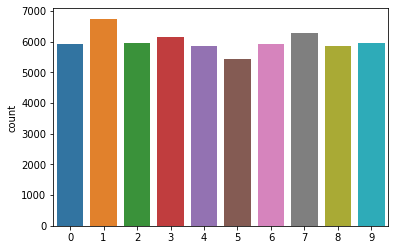

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

sns.countplot(y_train)

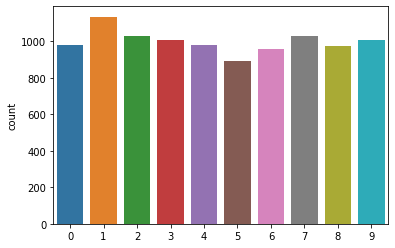

In [4]:
sns.countplot(y_test)

<Figure size 432x288 with 0 Axes>

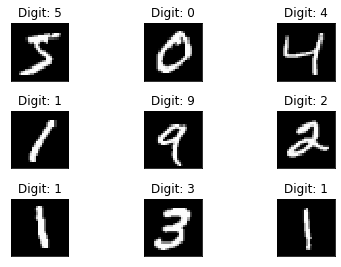

<Figure size 432x288 with 0 Axes>

In [18]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.figure()

In [19]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train / 255.
X_test = X_test / 255.

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

Y_train.shape

(60000, 10)

In [20]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2499 - accuracy: 0.9243 - val_loss: 0.1162 - val_accuracy: 0.9644
Epoch 2/10
 - 2s - loss: 0.1021 - accuracy: 0.9684 - val_loss: 0.0782 - val_accuracy: 0.9756
Epoch 3/10
 - 2s - loss: 0.0710 - accuracy: 0.9782 - val_loss: 0.0820 - val_accuracy: 0.9747
Epoch 4/10
 - 2s - loss: 0.0557 - accuracy: 0.9816 - val_loss: 0.0677 - val_accuracy: 0.9802
Epoch 5/10
 - 2s - loss: 0.0464 - accuracy: 0.9849 - val_loss: 0.0621 - val_accuracy: 0.9821
Epoch 6/10
 - 2s - loss: 0.0388 - accuracy: 0.9866 - val_loss: 0.0672 - val_accuracy: 0.9810
Epoch 7/10
 - 2s - loss: 0.0321 - accuracy: 0.9891 - val_loss: 0.0723 - val_accuracy: 0.9793
Epoch 8/10
 - 2s - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0719 - val_accuracy: 0.9803
Epoch 9/10
 - 2s - loss: 0.0276 - accuracy: 0.9905 - val_loss: 0.0752 - val_accuracy: 0.9805
Epoch 10/10
 - 2s - loss: 0.0247 - accuracy: 0.9913 - val_loss: 0.0803 - val_accuracy: 0.9803


<Figure size 432x288 with 0 Axes>

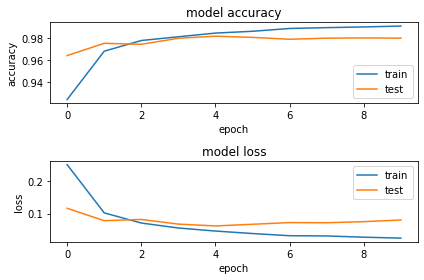

<Figure size 432x288 with 0 Axes>

In [22]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.figure()

In [32]:
predicted_classes = model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct)," classified correctly")
print(len(incorrect)," classified incorrectly")


9803  classified correctly
197  classified incorrectly


Correctly Classified images:


<Figure size 504x1008 with 0 Axes>

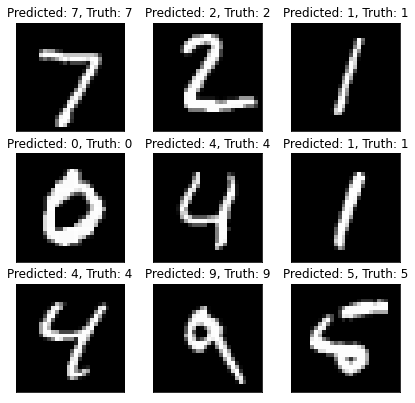

<Figure size 504x1008 with 0 Axes>

In [36]:
print("Correctly Classified images:")

plt.rcParams['figure.figsize'] = (7,14)

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

plt.figure()

Incorrectly Classified images:


<Figure size 504x1008 with 0 Axes>

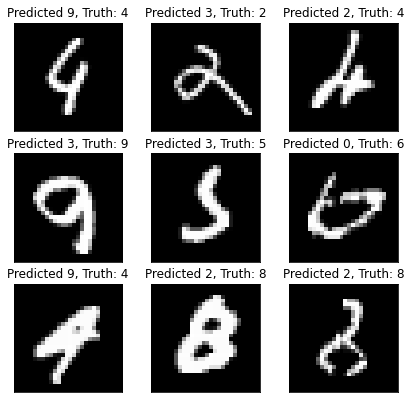

<Figure size 504x1008 with 0 Axes>

In [37]:
print("Incorrectly Classified images:")
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

plt.figure()